In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("application_train.csv")
test=pd.read_csv("application_test.csv")

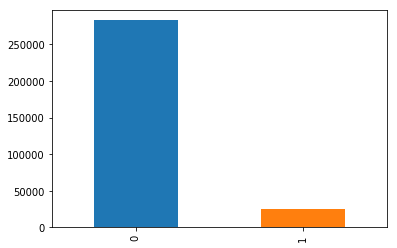

In [3]:
train["TARGET"].value_counts().plot.bar()

In [4]:
def missing_values_table(df):
    missing_val=df.isnull().sum()
    
    missing_value_percent=100*df.isnull().sum()/len(df)
    
    missing_value_tabl=pd.concat([missing_val,missing_value_percent], axis=1)
    
    missing_value_table_rename=missing_value_tabl.rename(columns={0:"missing_value", 1:"% of missing value"})
    
    missing_value_table_rename=missing_value_table_rename[
            missing_value_table_rename.iloc[:,1] != 0].sort_values(
        '% of missing value', ascending=False).round(1)
    
    return missing_value_table_rename
    

In [5]:
missing_train=missing_values_table(train)
missing_train.head(20)

,missing_value,% of missing value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [6]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
train.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [35]:
le=LabelEncoder()

for col in train.columns:
    if train[col].dtype=="object":
        if len(list(train[col].unique())) <=2:
            le.fit(train[col])
            train[col]=le.transform(train[col])
            test[col]=le.transform(test[col])
    
            

In [36]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [10]:
app_train,app_test=train.align(test, join="inner", axis=1)

In [11]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [37]:
y=train["TARGET"]
train=train.drop("TARGET", axis=1)

In [38]:
train=train[test.columns]

In [14]:
(train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
(train["DAYS_EMPLOYED"]).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [15]:
train.shape

(307511, 239)

In [16]:
test.shape

(48744, 239)

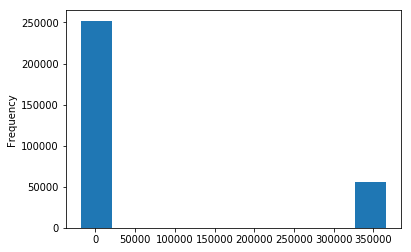

In [16]:
train["DAYS_EMPLOYED"].plot.hist()

In [17]:
len(train[train["DAYS_EMPLOYED"]==365243])

55374

In [18]:
train["DAYS_EMPLOYED"].replace(365243,np.nan,inplace=True)

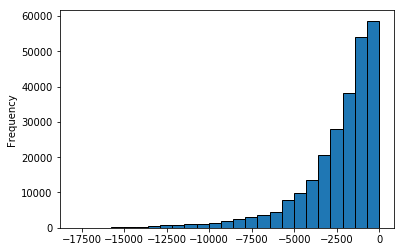

In [19]:
train["DAYS_EMPLOYED"].plot.hist(bins=25, edgecolor="k")

In [20]:
train["TARGET"]=y

In [21]:
corr=train.corr()["TARGET"].sort_values()

In [22]:
print(corr.head(10))
print(corr.tail(10))

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
Name: TARGET, dtype: float64
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


Text(0,0.5,'Count')

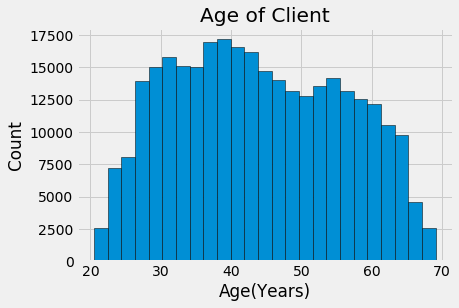

In [23]:
plt.style.use("fivethirtyeight")
(train["DAYS_BIRTH"]/-365).plot.hist(bins=25, edgecolor="k")
plt.title("Age of Client"); plt.xlabel("Age(Years)"); plt.ylabel("Count")

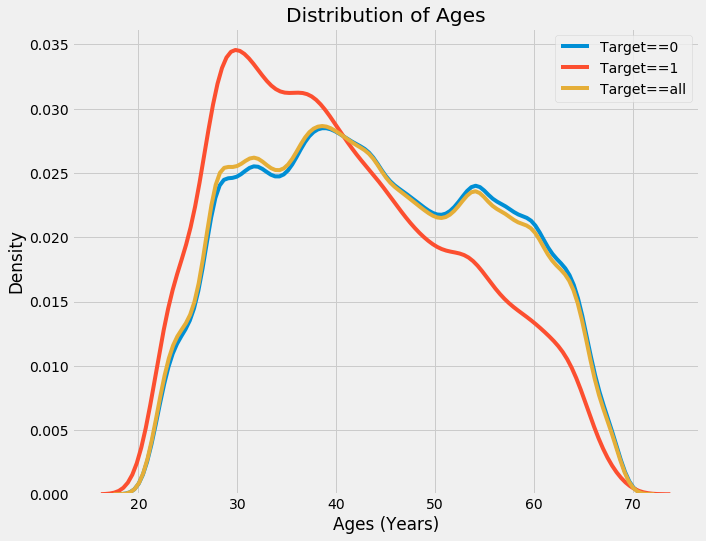

In [34]:
plt.figure(figsize=(10,8))
sns.kdeplot(train.loc[train["TARGET"]==0, "DAYS_BIRTH"]/-365, label= 'Target==0')
sns.kdeplot(train.loc[train["TARGET"]==1, "DAYS_BIRTH"]/-365, label= 'Target==1')
plt.title("Distribution of Ages"); plt.xlabel("Ages (Years)"); plt.ylabel("Density")

sns.kdeplot(train.loc[ : , "DAYS_BIRTH"]/-365, label= 'Target==all')


In [35]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [38]:
age_data=train[["TARGET","DAYS_BIRTH"]]
age_data["Age"]=train["DAYS_BIRTH"]/-365
age_data["bin"]=pd.cut(age_data["Age"], bins=np.linspace(20,70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,Age,bin
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [40]:
age_groups=age_data.groupby("bin").mean()
age_groups

,TARGET,DAYS_BIRTH,Age
bin,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


Text(0.5,1,'Faliure vs Age group')

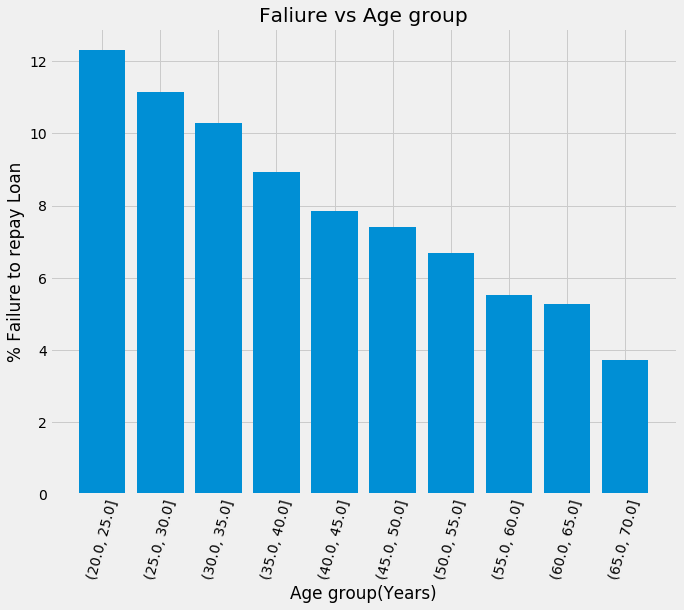

In [43]:
plt.figure(figsize=(10,8))
plt.bar(age_groups.index.astype(str), 100* age_groups["TARGET"])
plt.xticks(rotation=75)
plt.xlabel("Age group(Years)")
plt.ylabel("% Failure to repay Loan")
plt.title("Faliure vs Age group")

In [44]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

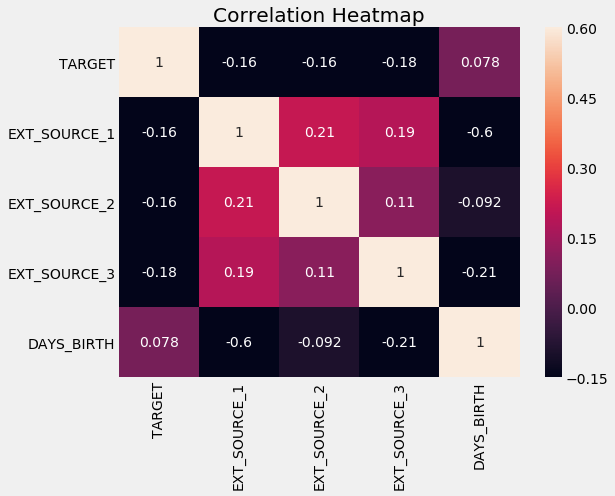

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(ext_data_corrs, annot=True, vmin=-0.15, vmax=0.6)
plt.title("Correlation Heatmap")

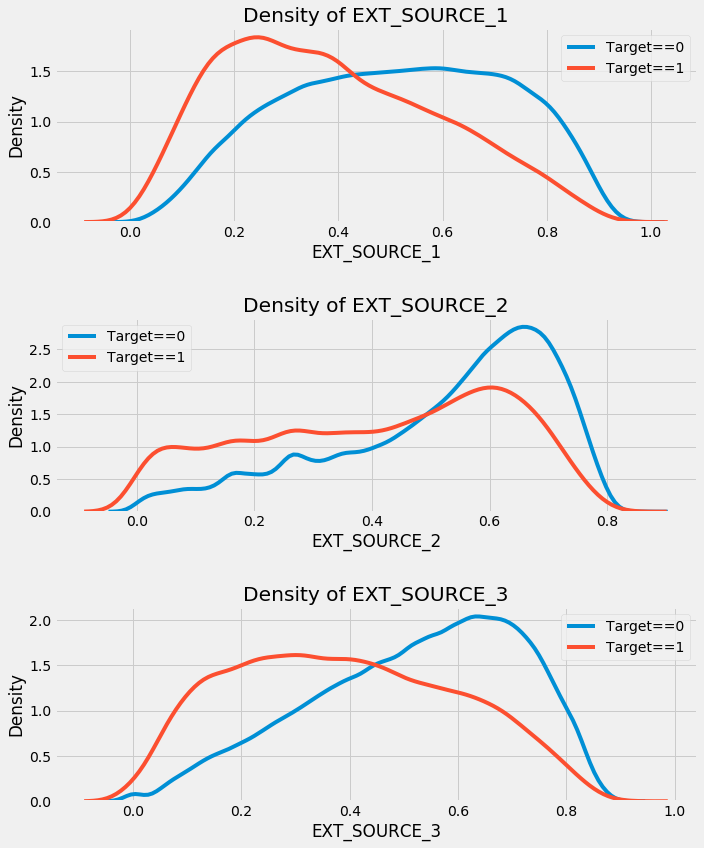

In [53]:
plt.figure(figsize = (10, 12))
for i, source in enumerate(["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]):
    plt.subplot(3,1,i+1)
    sns.kdeplot(ext_data.loc[ext_data["TARGET"]==0,source], label="Target==0")
    sns.kdeplot(ext_data.loc[ext_data["TARGET"]==1,source], label="Target==1")
    plt.title("Density of {}".format(source))
    plt.xlabel("{}".format(source))
    plt.ylabel("Density")
    
plt.tight_layout(h_pad = 2.5)    